### Import Necessary Libraries

In [1]:
import pandas as pd #Data analysis library
import numpy as np #numerical operation
import matplotlib.pyplot as plt# basic visualization
import seaborn as sns#visualization
from sklearn.linear_model import LogisticRegression#Logistics regression model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve# Classification metrics
import warnings
from sklearn.preprocessing import StandardScaler #make a input variable to fit in a same scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV #to split train and test data.
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
pd.set_option('display.max_columns', None)#Display all columns in the data
warnings.filterwarnings('ignore')#Remove the warnings
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bank-additional.csv'
bank = pd.read_csv(url, sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### Exploratory Data Analysis 

In [3]:
bank.info(memory_usage='deep')
#there is no null values. We have 10 numerical columns and 10 non numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [3]:
def values(col):
    print('No of unique values:\t', bank[col].nunique())
    print('Values Count:\n', bank[col].value_counts())
    

In [4]:
gg = bank['age'].value_counts()

In [5]:
groupped = bank.groupby('job')['y'].value_counts()

In [106]:
for i in groupped.index:
    print(i)
    print(groupped[i])

('admin.', 'no')
879
('admin.', 'yes')
133
('blue-collar', 'no')
823
('blue-collar', 'yes')
61
('entrepreneur', 'no')
140
('entrepreneur', 'yes')
8
('housemaid', 'no')
99
('housemaid', 'yes')
11
('management', 'no')
294
('management', 'yes')
30
('retired', 'no')
128
('retired', 'yes')
38
('self-employed', 'no')
146
('self-employed', 'yes')
13
('services', 'no')
358
('services', 'yes')
35
('student', 'no')
63
('student', 'yes')
19
('technician', 'no')
611
('technician', 'yes')
80
('unemployed', 'no')
92
('unemployed', 'yes')
19
('unknown', 'no')
35
('unknown', 'yes')
4


In [103]:
len(bank[bank['job']=='admin.'])

1012

In [6]:
def percent_cat(col):
    groupped = bank.groupby([col])['y'].value_counts()
    y=0
    for i in groupped.index:
        total_val = len(bank[bank[col]==i[0]])
        print(f'Percent of {i[1]} loan of {i[0]} in column {col} is {round((groupped[i]/total_val)*100,2)}%')
        y+=1
        if y==2:
            print('\n')
            y=0

In [125]:
percent_cat('job')

Percent of no loan of admin. in column job is 86.86%
Percent of yes loan of admin. in column job is 13.14%


Percent of no loan of blue-collar in column job is 93.1%
Percent of yes loan of blue-collar in column job is 6.9%


Percent of no loan of entrepreneur in column job is 94.59%
Percent of yes loan of entrepreneur in column job is 5.41%


Percent of no loan of housemaid in column job is 90.0%
Percent of yes loan of housemaid in column job is 10.0%


Percent of no loan of management in column job is 90.74%
Percent of yes loan of management in column job is 9.26%


Percent of no loan of retired in column job is 77.11%
Percent of yes loan of retired in column job is 22.89%


Percent of no loan of self-employed in column job is 91.82%
Percent of yes loan of self-employed in column job is 8.18%


Percent of no loan of services in column job is 91.09%
Percent of yes loan of services in column job is 8.91%


Percent of no loan of student in column job is 76.83%
Percent of yes loan of stud

In [34]:
values('age')

No of unique values:	 67
Values Count:
 32    216
31    191
30    177
34    174
35    172
     ... 
69      2
72      2
19      1
88      1
85      1
Name: age, Length: 67, dtype: int64


<AxesSubplot:xlabel='age', ylabel='Density'>

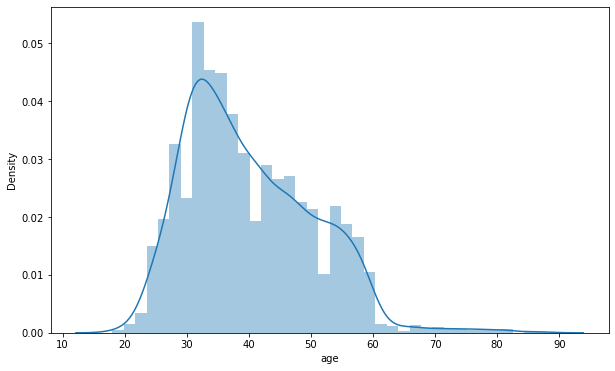

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(bank['age'])
#Age column follows the normal distribution

In [36]:
values('job')

No of unique values:	 12
Values Count:
 admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64


In [7]:
bank['Status'] = np.where(bank['y'] == 'no', 0, 1)

In [8]:
bank['Status'].value_counts()

0    3668
1     451
Name: Status, dtype: int64

In [19]:
def insight(col):
    plt.figure(figsize = (16,8))
    ax = sns.countplot(x = bank[col], hue = bank['y'])
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+13))

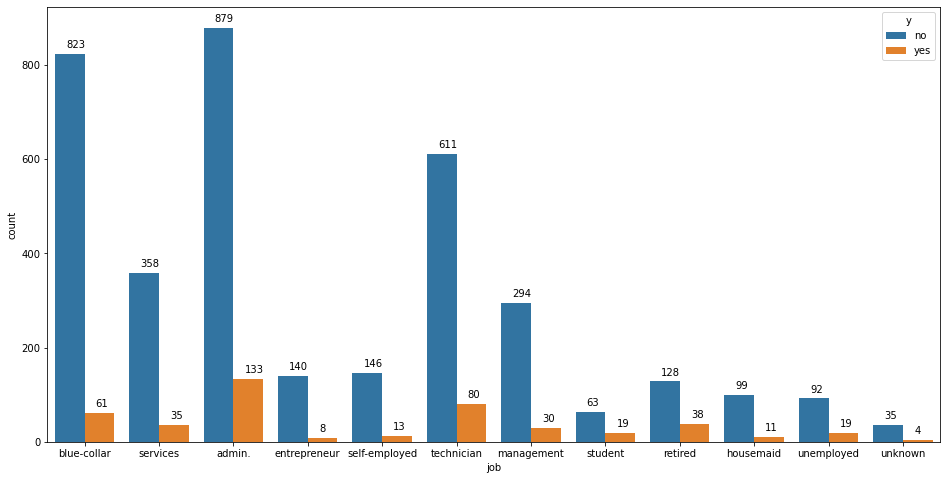

In [48]:
insight('job')

**Observation**
* Admin's has a higher chance of loan approval

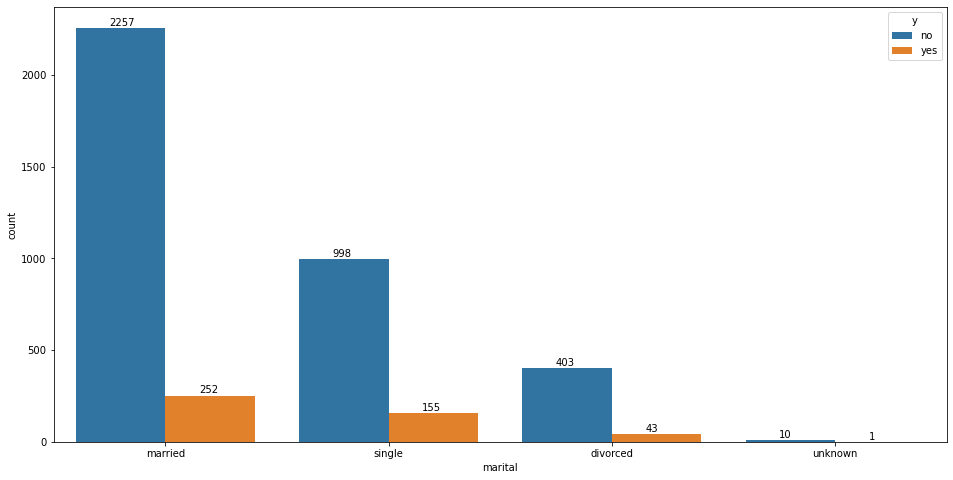

In [50]:
insight('marital')

**Observation**
* Married People have more loan rejection

In [55]:
values('education')

No of unique values:	 8
Values Count:
 university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64


In [9]:
mapper = {'basic.9y':'Basic','basic.4y':'Basic','basic.6y':'Basic','high.school':'School','university.degree':'Degree','professional.course':'Course','illiterate':'Illiterate'}

In [10]:
bank['education']=bank.education.map(mapper)

In [11]:
bank['education']

0        Basic
1       School
2       School
3        Basic
4       Degree
         ...  
4114     Basic
4115    School
4116    School
4117    School
4118    School
Name: education, Length: 4119, dtype: object

In [12]:
values('education')

No of unique values:	 5
Values Count:
 Degree        1264
Basic         1231
School         921
Course         535
Illiterate       1
Name: education, dtype: int64


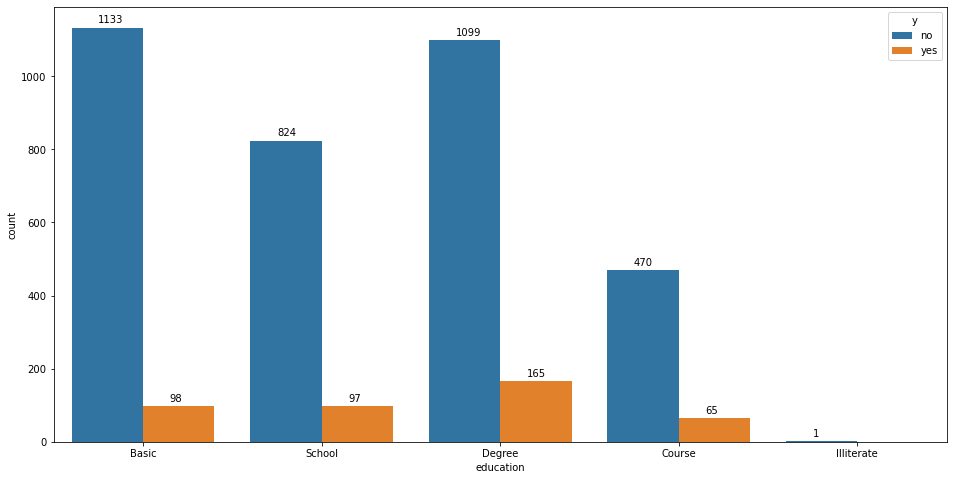

In [69]:
insight('education')

**Observation**
* Basic education people's loan rejected more

In [13]:
values('default')

No of unique values:	 3
Values Count:
 no         3315
unknown     803
yes           1
Name: default, dtype: int64


In [14]:
values('housing')

No of unique values:	 3
Values Count:
 yes        2175
no         1839
unknown     105
Name: housing, dtype: int64


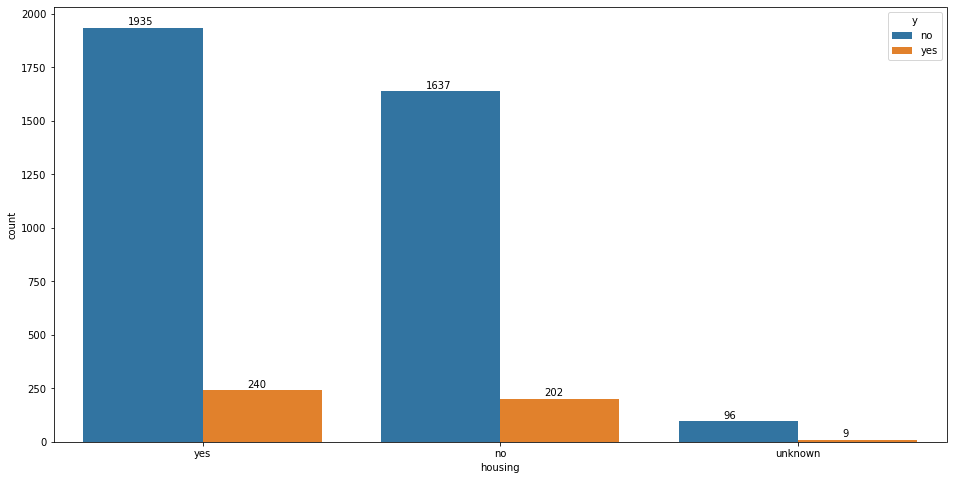

In [73]:
insight('housing')

In [15]:
values('loan')

No of unique values:	 3
Values Count:
 no         3349
yes         665
unknown     105
Name: loan, dtype: int64


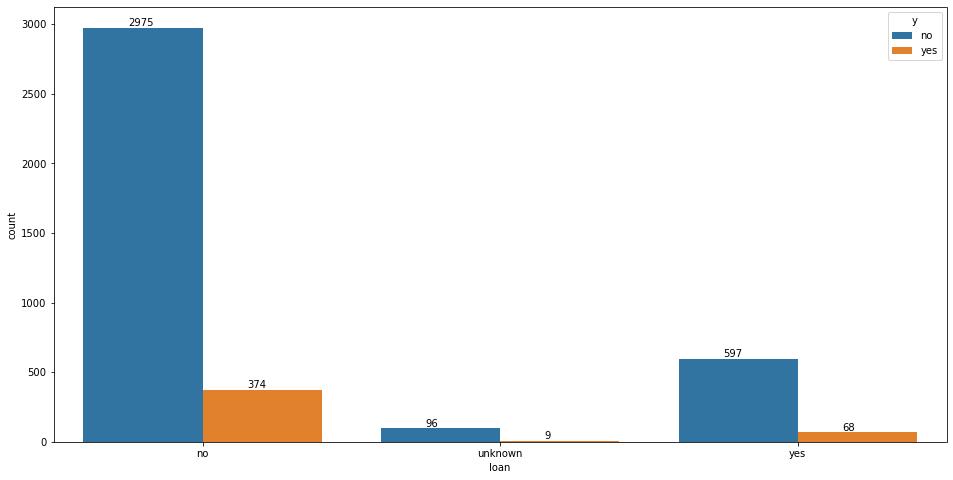

In [75]:
insight('loan')

In [76]:
values('contact')

No of unique values:	 2
Values Count:
 cellular     2652
telephone    1467
Name: contact, dtype: int64


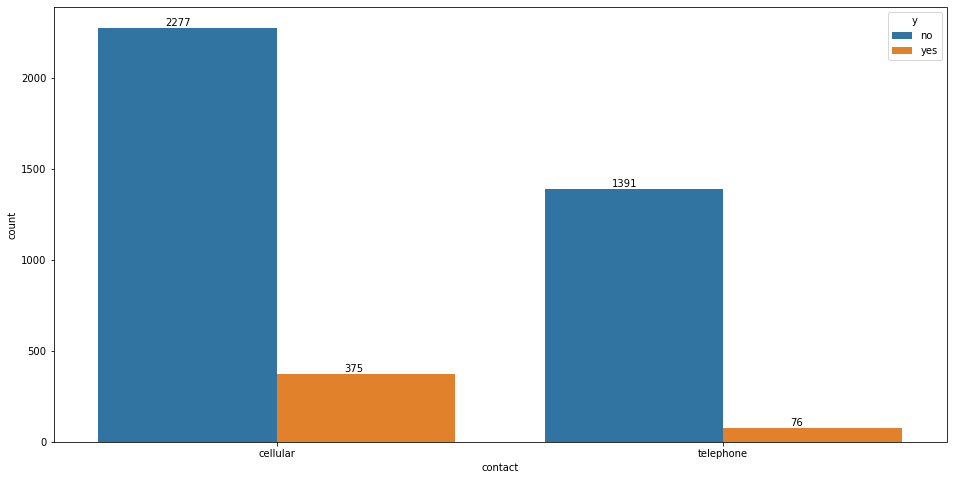

In [77]:
insight('contact')

In [126]:
percent_cat('contact')

Percent of no loan of cellular in column contact is 85.86%
Percent of yes loan of cellular in column contact is 14.14%


Percent of no loan of telephone in column contact is 94.82%
Percent of yes loan of telephone in column contact is 5.18%




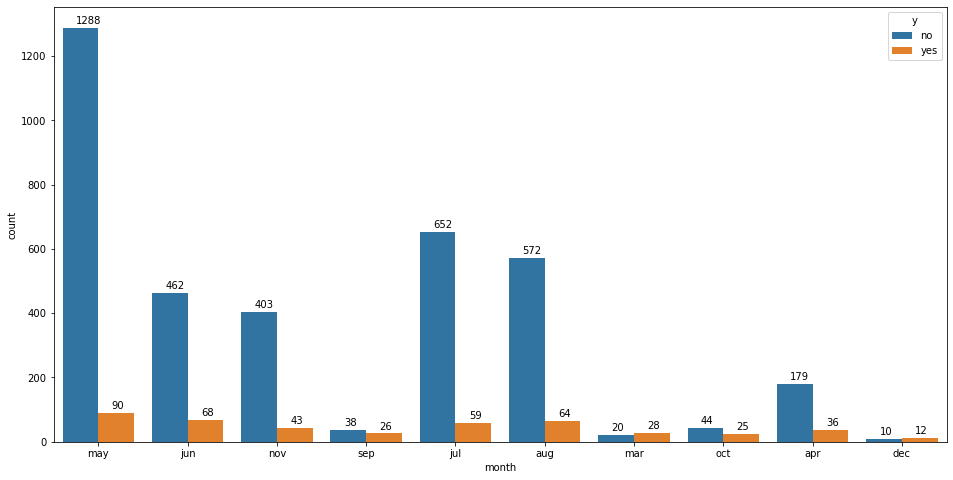

In [127]:
insight('month')

In [128]:
percent_cat('month')

#March month higher chance of getting loan approval

Percent of no loan of apr in column month is 83.26%
Percent of yes loan of apr in column month is 16.74%


Percent of no loan of aug in column month is 89.94%
Percent of yes loan of aug in column month is 10.06%


Percent of yes loan of dec in column month is 54.55%
Percent of no loan of dec in column month is 45.45%


Percent of no loan of jul in column month is 91.7%
Percent of yes loan of jul in column month is 8.3%


Percent of no loan of jun in column month is 87.17%
Percent of yes loan of jun in column month is 12.83%


Percent of yes loan of mar in column month is 58.33%
Percent of no loan of mar in column month is 41.67%


Percent of no loan of may in column month is 93.47%
Percent of yes loan of may in column month is 6.53%


Percent of no loan of nov in column month is 90.36%
Percent of yes loan of nov in column month is 9.64%


Percent of no loan of oct in column month is 63.77%
Percent of yes loan of oct in column month is 36.23%


Percent of no loan of sep in column month 

In [130]:
values('day_of_week')

No of unique values:	 5
Values Count:
 thu    860
mon    855
tue    841
wed    795
fri    768
Name: day_of_week, dtype: int64


In [134]:
percent_cat('day_of_week')
#there is no significant difference between day of week.

Percent of no loan of fri in column day_of_week is 89.19%
Percent of yes loan of fri in column day_of_week is 10.81%


Percent of no loan of mon in column day_of_week is 88.54%
Percent of yes loan of mon in column day_of_week is 11.46%


Percent of no loan of thu in column day_of_week is 88.84%
Percent of yes loan of thu in column day_of_week is 11.16%


Percent of no loan of tue in column day_of_week is 89.18%
Percent of yes loan of tue in column day_of_week is 10.82%


Percent of no loan of wed in column day_of_week is 89.56%
Percent of yes loan of wed in column day_of_week is 10.44%




In [135]:
values('duration')

No of unique values:	 828
Values Count:
 77      24
112     23
73      22
81      21
122     20
        ..
1357     1
1353     1
1241     1
1221     1
1441     1
Name: duration, Length: 828, dtype: int64


In [136]:
values('campaign')

No of unique values:	 25
Values Count:
 1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
17      14
13      11
16       7
14       6
19       2
15       2
23       2
22       2
29       2
27       1
24       1
18       1
35       1
Name: campaign, dtype: int64


In [139]:
values('pdays')

No of unique values:	 21
Values Count:
 999    3959
3        52
6        42
4        14
7        10
10        8
12        5
2         4
5         4
9         3
1         3
13        2
18        2
16        2
15        2
0         2
17        1
21        1
14        1
11        1
19        1
Name: pdays, dtype: int64


In [140]:
values('poutcome')

No of unique values:	 3
Values Count:
 nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64


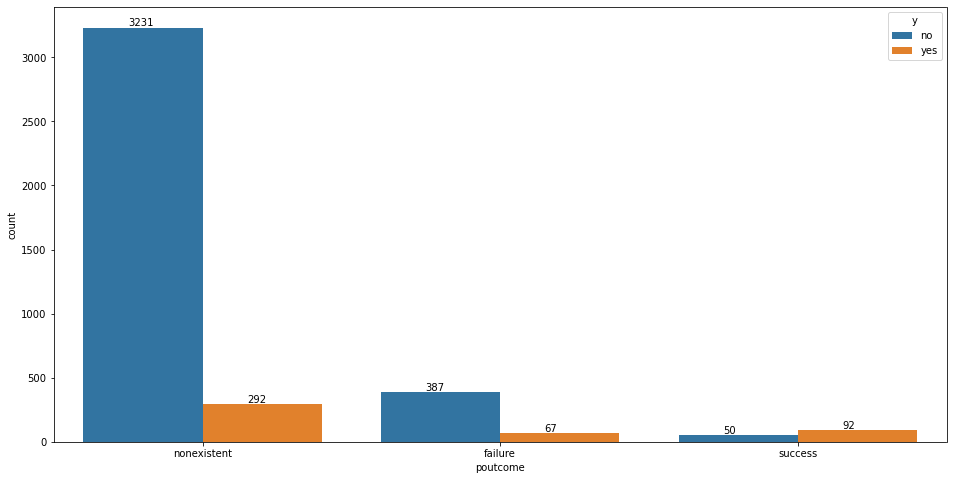

In [141]:
insight('poutcome')

In [143]:
percent_cat('poutcome')
#POutcome with success has higher chance of getting loan approval

Percent of no loan of failure in column poutcome is 85.24%
Percent of yes loan of failure in column poutcome is 14.76%


Percent of no loan of nonexistent in column poutcome is 91.71%
Percent of yes loan of nonexistent in column poutcome is 8.29%


Percent of yes loan of success in column poutcome is 64.79%
Percent of no loan of success in column poutcome is 35.21%




In [144]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'Status'],
      dtype='object')

In [145]:
values('emp.var.rate')

No of unique values:	 10
Values Count:
  1.4    1626
-1.8     883
 1.1     758
-0.1     392
-2.9     164
-3.4     104
-1.7      87
-1.1      83
-3.0      21
-0.2       1
Name: emp.var.rate, dtype: int64


In [146]:
percent_cat('emp.var.rate')

Percent of no loan of -3.4 in column emp.var.rate is 62.5%
Percent of yes loan of -3.4 in column emp.var.rate is 37.5%


Percent of yes loan of -3.0 in column emp.var.rate is 57.14%
Percent of no loan of -3.0 in column emp.var.rate is 42.86%


Percent of no loan of -2.9 in column emp.var.rate is 65.24%
Percent of yes loan of -2.9 in column emp.var.rate is 34.76%


Percent of no loan of -1.8 in column emp.var.rate is 85.39%
Percent of yes loan of -1.8 in column emp.var.rate is 14.61%


Percent of yes loan of -1.7 in column emp.var.rate is 51.72%
Percent of no loan of -1.7 in column emp.var.rate is 48.28%


Percent of no loan of -1.1 in column emp.var.rate is 57.83%
Percent of yes loan of -1.1 in column emp.var.rate is 42.17%


Percent of no loan of -0.2 in column emp.var.rate is 100.0%
Percent of no loan of -0.1 in column emp.var.rate is 94.9%


Percent of yes loan of -0.1 in column emp.var.rate is 5.1%
Percent of no loan of 1.1 in column emp.var.rate is 96.7%


Percent of yes loan of 1

In [148]:
values('cons.price.idx')

No of unique values:	 26
Values Count:
 93.994    758
93.918    667
92.893    597
93.444    528
94.465    431
93.200    386
93.075    201
92.963     75
92.201     75
92.431     43
94.199     39
92.649     36
94.027     33
94.215     30
92.379     25
92.843     25
94.055     24
94.767     24
93.369     23
93.876     23
92.713     21
94.601     20
93.749     14
92.469     14
93.798      6
92.756      1
Name: cons.price.idx, dtype: int64


In [151]:
values('cons.conf.idx')

No of unique values:	 26
Values Count:
 -36.4    758
-42.7    667
-46.2    597
-36.1    528
-41.8    431
-42.0    386
-47.1    201
-31.4     75
-40.8     75
-26.9     43
-37.5     39
-30.1     36
-38.3     33
-40.3     30
-29.8     25
-50.0     25
-39.8     24
-50.8     24
-34.8     23
-40.0     23
-33.0     21
-49.5     20
-34.6     14
-33.6     14
-40.4      6
-45.9      1
Name: cons.conf.idx, dtype: int64


In [150]:
v

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Status
0,30,blue-collar,married,Basic,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
1,39,services,single,School,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0
2,25,services,married,School,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
3,38,services,married,Basic,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
4,47,admin.,married,Degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,Basic,no,yes,yes,cellular,jul,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0
4115,39,admin.,married,School,no,yes,no,telephone,jul,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0
4116,27,student,single,School,no,no,no,cellular,may,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,School,no,no,no,cellular,aug,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0


<AxesSubplot:xlabel='euribor3m'>

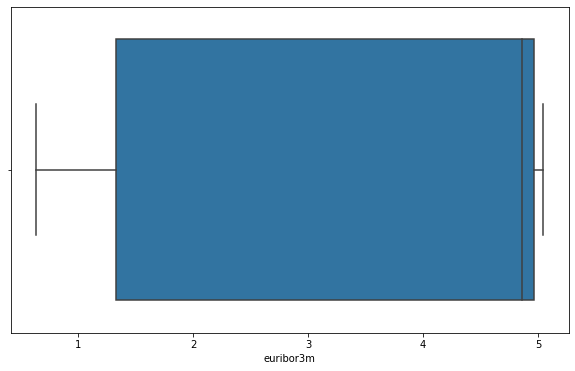

In [155]:
plt.figure(figsize=(10,6))
sns.boxplot(x = bank['euribor3m'])

<AxesSubplot:ylabel='Density'>

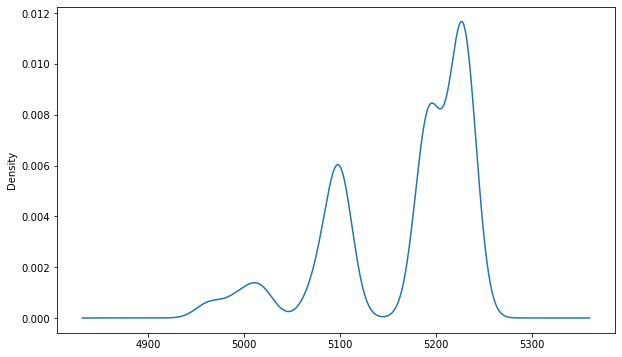

In [158]:
plt.figure(figsize=(10,6))
bank['nr.employed'].plot.kde()

#### Feature Engineering

In [167]:
bank.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Status
count,4119.000000,4119,4119,3952,4119,4119,4119,4119,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119,4119.000000
unique,NaN,12,4,5,3,3,3,2,NaN,5,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,admin.,married,Degree,no,yes,no,cellular,NaN,thu,NaN,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no,NaN
freq,NaN,1012,2509,1264,3315,2175,3349,2652,NaN,860,NaN,NaN,NaN,NaN,3523,NaN,NaN,NaN,NaN,NaN,3668,NaN
mean,40.113620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197251,NaN,256.788055,2.537266,960.422190,0.190337,NaN,0.084972,93.579704,-40.499102,3.621356,5166.481695,NaN,0.109493
std,10.313362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.104473,NaN,254.703736,2.568159,191.922786,0.541788,NaN,1.563114,0.579349,4.594578,1.733591,73.667904,NaN,0.312294
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005341,NaN,0.000000,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.635000,4963.600000,NaN,0.000000
25%,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128672,NaN,103.000000,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.334000,5099.100000,NaN,0.000000
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.172615,NaN,181.000000,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN,0.000000
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.334547,NaN,317.000000,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN,0.000000


In [16]:
bank['month'] = bank['month'].map(bank.month.value_counts(normalize=True).to_dict())
#Frequency encoding

In [17]:
bank['Status']

0       0
1       0
2       0
3       0
4       0
       ..
4114    0
4115    0
4116    0
4117    0
4118    0
Name: Status, Length: 4119, dtype: int64

In [18]:
bank.drop('y', axis =1, inplace=True)

In [19]:
cat_columns = bank.select_dtypes(exclude=np.number).columns

In [20]:
encoded_df = pd.get_dummies(bank[cat_columns])

In [21]:
encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_Course,education_Degree,education_Illiterate,education_School,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


In [22]:
numer_df = bank.drop(cat_columns, axis = 1)
#Seprating numerical type variable

In [23]:
final_df = pd.concat([numer_df, encoded_df], axis=1)
#Concatenating numerical and encoded df

In [24]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Status
0,30,blue-collar,married,Basic,no,yes,no,cellular,0.334547,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,School,no,no,no,telephone,0.334547,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,School,no,yes,no,telephone,0.128672,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,Basic,no,unknown,unknown,telephone,0.128672,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,Degree,no,yes,no,cellular,0.108279,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,Basic,no,yes,yes,cellular,0.172615,thu,53,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,School,no,yes,no,telephone,0.172615,fri,219,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,School,no,no,no,cellular,0.334547,mon,64,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,School,no,no,no,cellular,0.154406,fri,528,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0


In [25]:
final_df.head()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Status,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_Course,education_Degree,education_Illiterate,education_School,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,0.334547,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
1,39,0.334547,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
2,25,0.128672,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
3,38,0.128672,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0
4,47,0.108279,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0


In [26]:
X = final_df.drop('Status', axis = 1)
y = final_df['Status']

#### Scaling  

In [27]:
sc = StandardScaler()

sc.fit(X)

StandardScaler()

In [28]:
X_scaled = pd.DataFrame(data = sc.transform(X), columns=X.columns)

In [29]:
X_scaled.head()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_Basic,education_Course,education_Degree,education_Illiterate,education_School,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-0.980752,1.314338,0.903952,-0.209228,0.201031,-0.351356,-1.206054,-1.185448,-1.240939,-1.331707,-0.914779,-0.570715,1.912983,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,1.531685,-0.386361,-0.665381,-0.015583,-0.536649,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,0.479499,-0.161736,-0.438783,0.743752,-0.743752,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
1,-0.107991,1.314338,0.350300,0.569634,0.201031,-0.351356,0.649441,0.715193,0.892269,0.711698,0.332862,-0.570715,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,-1.248353,1.603876,-0.051747,-0.652876,-0.386361,-0.665381,-0.015583,1.863414,0.492477,-0.492097,-0.015583,1.113465,-0.161736,-1.057746,0.479499,-0.161736,-0.438783,-1.344534,1.344534,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
2,-1.465619,-0.656503,-0.116966,-0.598660,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.773427,0.836535,-0.570715,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.652876,-0.386361,-0.665381,-0.015583,1.863414,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,0.479499,-0.161736,-0.438783,-1.344534,1.344534,-0.478733,-0.511809,-0.513697,-0.506516,2.044782,-0.351958,0.411308,-0.188958
3,-0.204965,-0.656503,-0.941553,0.180203,0.201031,-0.351356,0.841389,1.528273,-0.283172,0.771697,0.836535,-0.570715,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,3.079110,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,1.531685,-0.386361,-0.665381,-0.015583,-0.536649,0.492477,-0.492097,-0.015583,-0.898097,6.182926,-1.057746,-2.085510,6.182926,-0.438783,-1.344534,1.344534,2.088847,-0.511809,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958
4,0.667795,-0.851728,-0.780563,-0.598660,0.201031,-0.351356,-0.118350,-0.655478,-0.326707,0.328632,0.398028,1.752187,-0.522744,-0.193055,-0.165645,-0.292191,-0.204923,-0.200378,-0.324769,-0.142521,-0.448971,-0.166417,-0.097769,-0.348463,0.801056,-0.623489,-0.051747,-0.652876,-0.386361,1.502898,-0.015583,-0.536649,0.492477,-0.492097,-0.015583,-0.898097,-0.161736,0.945406,0.479499,-0.161736,-0.438783,0.743752,-0.743752,-0.478733,1.953854,-0.513697,-0.506516,-0.489050,-0.351958,0.411308,-0.188958


### Spliting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

### Modelling

In [31]:
def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

In [32]:
def predictions(model,X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        #predictions
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        actual = [y_train, y_test]
        pred = [train_pred, test_pred]
        for i in range(0,2):
            if i==0:
                print('----Train Metrics----')
            else:
                print('----Test Metrics----')
            metrics(actual[i], pred[i])
        plot_roc_curve(model, X_train, y_train)

#### Logistic Regression

In [33]:
lg = LogisticRegression()

----Train Metrics----
Confusion Matrix:
 [[2519   57]
 [ 177  130]]


Accuracy Score:
 0.918834547346514


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      2576
           1       0.70      0.42      0.53       307

    accuracy                           0.92      2883
   macro avg       0.81      0.70      0.74      2883
weighted avg       0.91      0.92      0.91      2883

----Test Metrics----
Confusion Matrix:
 [[1059   33]
 [  83   61]]


Accuracy Score:
 0.9061488673139159


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1092
           1       0.65      0.42      0.51       144

    accuracy                           0.91      1236
   macro avg       0.79      0.70      0.73      1236
weighted avg       0.89      0.91      0.90      1236



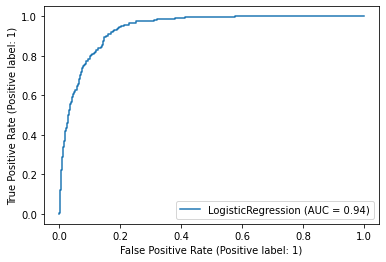

In [41]:
predictions(lg, X_train, X_test, y_train, y_test)

#### KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors=7 ,n_jobs=-1)

----Train Metrics----
Confusion Matrix:
 [[2548   28]
 [ 233   74]]


Accuracy Score:
 0.9094693028095734


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      2576
           1       0.73      0.24      0.36       307

    accuracy                           0.91      2883
   macro avg       0.82      0.62      0.66      2883
weighted avg       0.90      0.91      0.89      2883

----Test Metrics----
Confusion Matrix:
 [[1077   15]
 [ 115   29]]


Accuracy Score:
 0.8948220064724919


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1092
           1       0.66      0.20      0.31       144

    accuracy                           0.89      1236
   macro avg       0.78      0.59      0.63      1236
weighted avg       0.88      0.89      0.87      1236



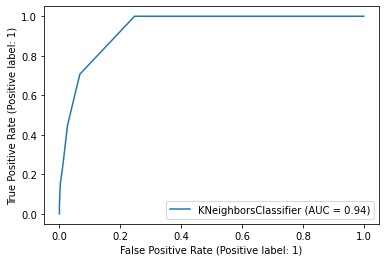

In [43]:
predictions(knn, X_train, X_test, y_train, y_test)

#### Naive Bayes 

In [44]:
nb = GaussianNB()

----Train Metrics----
Confusion Matrix:
 [[  96 2480]
 [   0  307]]


Accuracy Score:
 0.13978494623655913


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.04      0.07      2576
           1       0.11      1.00      0.20       307

    accuracy                           0.14      2883
   macro avg       0.56      0.52      0.14      2883
weighted avg       0.91      0.14      0.09      2883

----Test Metrics----
Confusion Matrix:
 [[  26 1066]
 [   1  143]]


Accuracy Score:
 0.13673139158576053


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.02      0.05      1092
           1       0.12      0.99      0.21       144

    accuracy                           0.14      1236
   macro avg       0.54      0.51      0.13      1236
weighted avg       0.86      0.14      0.07      1236



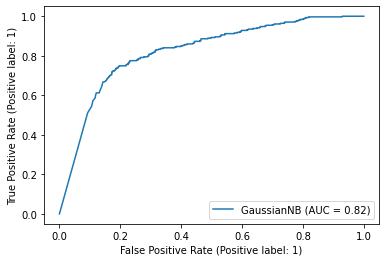

In [45]:
predictions(nb, X_train, X_test, y_train, y_test)

#### SMOTE

In [46]:
from imblearn.combine import SMOTEENN,SMOTETomek

In [47]:
sm = SMOTETomek(0.6)

In [48]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f'The Number of class before the fit \n {y_train.value_counts()}')

print(f'The Number of class after the fit \n {y_train_sm.value_counts()}')

The Number of class before the fit 
 0    2576
1     307
Name: Status, dtype: int64
The Number of class after the fit 
 0    2571
1    1540
Name: Status, dtype: int64


----Train Metrics----
Confusion Matrix:
 [[2306  265]
 [ 236 1304]]


Accuracy Score:
 0.878131841401119


Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      2571
           1       0.83      0.85      0.84      1540

    accuracy                           0.88      4111
   macro avg       0.87      0.87      0.87      4111
weighted avg       0.88      0.88      0.88      4111

----Test Metrics----
Confusion Matrix:
 [[981 111]
 [ 27 117]]


Accuracy Score:
 0.8883495145631068


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93      1092
           1       0.51      0.81      0.63       144

    accuracy                           0.89      1236
   macro avg       0.74      0.86      0.78      1236
weighted avg       0.92      0.89      0.90      1236



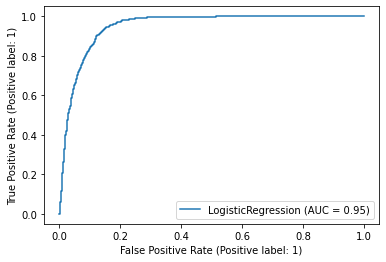

In [49]:
predictions(lg, X_train_sm, X_test, y_train_sm, y_test)

#### Decision Tree

In [36]:
dtree = DecisionTreeClassifier()

----Train Metrics----
Confusion Matrix:
 [[2576    0]
 [   0  307]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00       307

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883

----Test Metrics----
Confusion Matrix:
 [[1026   66]
 [  75   69]]


Accuracy Score:
 0.8859223300970874


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1092
           1       0.51      0.48      0.49       144

    accuracy                           0.89      1236
   macro avg       0.72      0.71      0.72      1236
weighted avg       0.88      0.89      0.88      1236



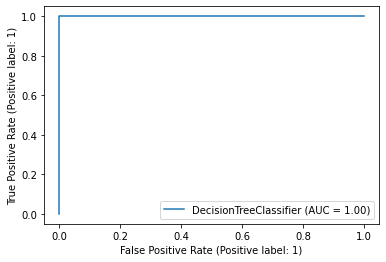

In [52]:
predictions(dtree, X_train, X_test, y_train, y_test)

### Random Forest

In [53]:
rf = RandomForestClassifier()

----Train Metrics----
Confusion Matrix:
 [[2576    0]
 [   0  307]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00       307

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883

----Test Metrics----
Confusion Matrix:
 [[1068   24]
 [  89   55]]


Accuracy Score:
 0.9085760517799353


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1092
           1       0.70      0.38      0.49       144

    accuracy                           0.91      1236
   macro avg       0.81      0.68      0.72      1236
weighted avg       0.90      0.91      0.90      1236



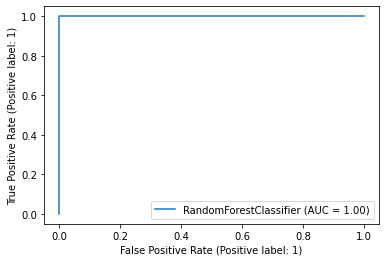

In [54]:
predictions(rf, X_train, X_test, y_train, y_test)

#### Bagging

In [58]:
bag = BaggingClassifier()

----Train Metrics----
Confusion Matrix:
 [[2573    3]
 [  31  276]]


Accuracy Score:
 0.9882067291016302


Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2576
           1       0.99      0.90      0.94       307

    accuracy                           0.99      2883
   macro avg       0.99      0.95      0.97      2883
weighted avg       0.99      0.99      0.99      2883

----Test Metrics----
Confusion Matrix:
 [[1049   43]
 [  75   69]]


Accuracy Score:
 0.9045307443365695


Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1092
           1       0.62      0.48      0.54       144

    accuracy                           0.90      1236
   macro avg       0.77      0.72      0.74      1236
weighted avg       0.90      0.90      0.90      1236



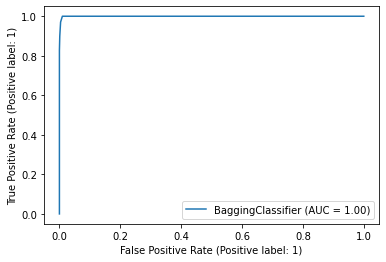

In [59]:
predictions(bag, X_train, X_test, y_train, y_test)

#### Ada Boost

In [60]:
ada = AdaBoostClassifier()

----Train Metrics----
Confusion Matrix:
 [[2505   71]
 [ 157  150]]


Accuracy Score:
 0.9209157127991675


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      2576
           1       0.68      0.49      0.57       307

    accuracy                           0.92      2883
   macro avg       0.81      0.73      0.76      2883
weighted avg       0.91      0.92      0.92      2883

----Test Metrics----
Confusion Matrix:
 [[1053   39]
 [  88   56]]


Accuracy Score:
 0.8972491909385113


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1092
           1       0.59      0.39      0.47       144

    accuracy                           0.90      1236
   macro avg       0.76      0.68      0.71      1236
weighted avg       0.88      0.90      0.89      1236



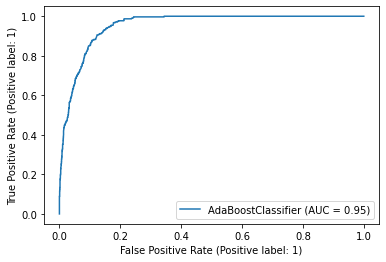

In [61]:
predictions(ada, X_train, X_test, y_train, y_test)

#### XGBoost

In [62]:
xgb = XGBClassifier()

[11:35:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
----Train Metrics----
Confusion Matrix:
 [[2576    0]
 [   0  307]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00       307

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883

----Test Metrics----
Confusion Matrix:
 [[1048   44]
 [  70   74]]


Accuracy Score:
 0.9077669902912622


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1092
           1       0.63      0.51      0.56       144

    acc

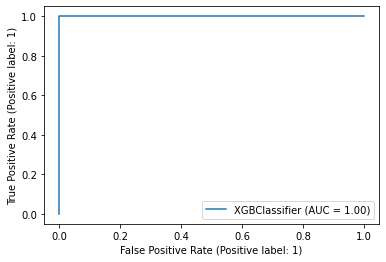

In [63]:
predictions(xgb, X_train, X_test, y_train, y_test)

#### LightGBM

In [64]:
lgbm = LGBMClassifier()

----Train Metrics----
Confusion Matrix:
 [[2576    0]
 [   1  306]]


Accuracy Score:
 0.9996531390912244


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2576
           1       1.00      1.00      1.00       307

    accuracy                           1.00      2883
   macro avg       1.00      1.00      1.00      2883
weighted avg       1.00      1.00      1.00      2883

----Test Metrics----
Confusion Matrix:
 [[1051   41]
 [  70   74]]


Accuracy Score:
 0.9101941747572816


Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1092
           1       0.64      0.51      0.57       144

    accuracy                           0.91      1236
   macro avg       0.79      0.74      0.76      1236
weighted avg       0.90      0.91      0.91      1236



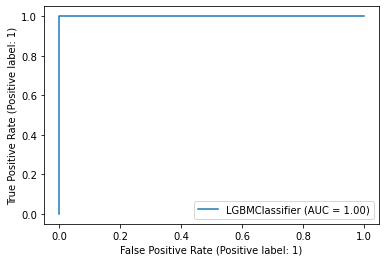

In [65]:
predictions(lgbm, X_train, X_test, y_train, y_test)

#### CAT Boost

In [66]:
cat = CatBoostClassifier()

Learning rate set to 0.016192
0:	learn: 0.6750716	total: 60ms	remaining: 59.9s
1:	learn: 0.6505080	total: 63.7ms	remaining: 31.8s
2:	learn: 0.6343345	total: 67.5ms	remaining: 22.4s
3:	learn: 0.6166178	total: 72.6ms	remaining: 18.1s
4:	learn: 0.6024552	total: 76.5ms	remaining: 15.2s
5:	learn: 0.5775781	total: 80.4ms	remaining: 13.3s
6:	learn: 0.5624304	total: 84.2ms	remaining: 11.9s
7:	learn: 0.5417689	total: 88.3ms	remaining: 10.9s
8:	learn: 0.5272527	total: 92ms	remaining: 10.1s
9:	learn: 0.5157304	total: 95.8ms	remaining: 9.48s
10:	learn: 0.4974800	total: 100ms	remaining: 9.02s
11:	learn: 0.4874598	total: 104ms	remaining: 8.56s
12:	learn: 0.4747768	total: 108ms	remaining: 8.19s
13:	learn: 0.4639220	total: 112ms	remaining: 7.86s
14:	learn: 0.4485921	total: 115ms	remaining: 7.57s
15:	learn: 0.4391225	total: 119ms	remaining: 7.31s
16:	learn: 0.4290250	total: 123ms	remaining: 7.09s
17:	learn: 0.4198996	total: 126ms	remaining: 6.9s
18:	learn: 0.4080204	total: 130ms	remaining: 6.72s
19:	le

175:	learn: 0.1546625	total: 757ms	remaining: 3.54s
176:	learn: 0.1544286	total: 762ms	remaining: 3.54s
177:	learn: 0.1541333	total: 766ms	remaining: 3.54s
178:	learn: 0.1539051	total: 769ms	remaining: 3.53s
179:	learn: 0.1537153	total: 775ms	remaining: 3.53s
180:	learn: 0.1534488	total: 788ms	remaining: 3.57s
181:	learn: 0.1532833	total: 796ms	remaining: 3.58s
182:	learn: 0.1530660	total: 803ms	remaining: 3.59s
183:	learn: 0.1527655	total: 807ms	remaining: 3.58s
184:	learn: 0.1525078	total: 812ms	remaining: 3.58s
185:	learn: 0.1523862	total: 818ms	remaining: 3.58s
186:	learn: 0.1522035	total: 824ms	remaining: 3.58s
187:	learn: 0.1520165	total: 833ms	remaining: 3.6s
188:	learn: 0.1517589	total: 837ms	remaining: 3.59s
189:	learn: 0.1515510	total: 842ms	remaining: 3.59s
190:	learn: 0.1513801	total: 847ms	remaining: 3.58s
191:	learn: 0.1511256	total: 852ms	remaining: 3.59s
192:	learn: 0.1509630	total: 860ms	remaining: 3.6s
193:	learn: 0.1506697	total: 865ms	remaining: 3.6s
194:	learn: 0.1

335:	learn: 0.1273158	total: 1.5s	remaining: 2.97s
336:	learn: 0.1271991	total: 1.51s	remaining: 2.97s
337:	learn: 0.1270415	total: 1.52s	remaining: 2.99s
338:	learn: 0.1267949	total: 1.53s	remaining: 2.98s
339:	learn: 0.1266130	total: 1.54s	remaining: 2.99s
340:	learn: 0.1265384	total: 1.54s	remaining: 2.98s
341:	learn: 0.1263798	total: 1.55s	remaining: 2.98s
342:	learn: 0.1262360	total: 1.56s	remaining: 2.98s
343:	learn: 0.1261724	total: 1.56s	remaining: 2.98s
344:	learn: 0.1260814	total: 1.57s	remaining: 2.99s
345:	learn: 0.1258838	total: 1.58s	remaining: 2.99s
346:	learn: 0.1258073	total: 1.59s	remaining: 2.98s
347:	learn: 0.1257367	total: 1.59s	remaining: 2.99s
348:	learn: 0.1256368	total: 1.6s	remaining: 2.99s
349:	learn: 0.1255469	total: 1.61s	remaining: 2.99s
350:	learn: 0.1254438	total: 1.62s	remaining: 2.99s
351:	learn: 0.1253143	total: 1.62s	remaining: 2.98s
352:	learn: 0.1251822	total: 1.63s	remaining: 2.99s
353:	learn: 0.1251113	total: 1.64s	remaining: 2.98s
354:	learn: 0.

508:	learn: 0.1067588	total: 2.54s	remaining: 2.45s
509:	learn: 0.1066374	total: 2.55s	remaining: 2.45s
510:	learn: 0.1065470	total: 2.55s	remaining: 2.44s
511:	learn: 0.1064550	total: 2.56s	remaining: 2.44s
512:	learn: 0.1063443	total: 2.56s	remaining: 2.44s
513:	learn: 0.1062843	total: 2.57s	remaining: 2.43s
514:	learn: 0.1062121	total: 2.58s	remaining: 2.43s
515:	learn: 0.1060682	total: 2.59s	remaining: 2.43s
516:	learn: 0.1059379	total: 2.59s	remaining: 2.42s
517:	learn: 0.1057975	total: 2.6s	remaining: 2.42s
518:	learn: 0.1056308	total: 2.6s	remaining: 2.41s
519:	learn: 0.1055191	total: 2.61s	remaining: 2.41s
520:	learn: 0.1054094	total: 2.61s	remaining: 2.4s
521:	learn: 0.1053085	total: 2.62s	remaining: 2.4s
522:	learn: 0.1051967	total: 2.62s	remaining: 2.39s
523:	learn: 0.1051118	total: 2.63s	remaining: 2.39s
524:	learn: 0.1050167	total: 2.64s	remaining: 2.38s
525:	learn: 0.1049396	total: 2.64s	remaining: 2.38s
526:	learn: 0.1047783	total: 2.65s	remaining: 2.38s
527:	learn: 0.10

685:	learn: 0.0910862	total: 3.63s	remaining: 1.66s
686:	learn: 0.0909984	total: 3.63s	remaining: 1.66s
687:	learn: 0.0908675	total: 3.64s	remaining: 1.65s
688:	learn: 0.0907650	total: 3.64s	remaining: 1.64s
689:	learn: 0.0907041	total: 3.65s	remaining: 1.64s
690:	learn: 0.0906504	total: 3.65s	remaining: 1.63s
691:	learn: 0.0905233	total: 3.66s	remaining: 1.63s
692:	learn: 0.0904842	total: 3.66s	remaining: 1.62s
693:	learn: 0.0904008	total: 3.67s	remaining: 1.62s
694:	learn: 0.0902851	total: 3.67s	remaining: 1.61s
695:	learn: 0.0902025	total: 3.69s	remaining: 1.61s
696:	learn: 0.0901980	total: 3.69s	remaining: 1.6s
697:	learn: 0.0900479	total: 3.69s	remaining: 1.6s
698:	learn: 0.0899669	total: 3.7s	remaining: 1.59s
699:	learn: 0.0899461	total: 3.71s	remaining: 1.59s
700:	learn: 0.0898691	total: 3.71s	remaining: 1.58s
701:	learn: 0.0897916	total: 3.71s	remaining: 1.58s
702:	learn: 0.0897447	total: 3.72s	remaining: 1.57s
703:	learn: 0.0896322	total: 3.73s	remaining: 1.57s
704:	learn: 0.0

874:	learn: 0.0755200	total: 4.74s	remaining: 677ms
875:	learn: 0.0755105	total: 4.75s	remaining: 672ms
876:	learn: 0.0754734	total: 4.75s	remaining: 667ms
877:	learn: 0.0753951	total: 4.76s	remaining: 661ms
878:	learn: 0.0753394	total: 4.76s	remaining: 656ms
879:	learn: 0.0752682	total: 4.77s	remaining: 650ms
880:	learn: 0.0752287	total: 4.77s	remaining: 645ms
881:	learn: 0.0751292	total: 4.78s	remaining: 639ms
882:	learn: 0.0750215	total: 4.78s	remaining: 634ms
883:	learn: 0.0749216	total: 4.79s	remaining: 628ms
884:	learn: 0.0748546	total: 4.79s	remaining: 623ms
885:	learn: 0.0747816	total: 4.8s	remaining: 617ms
886:	learn: 0.0747723	total: 4.8s	remaining: 612ms
887:	learn: 0.0746975	total: 4.8s	remaining: 606ms
888:	learn: 0.0746884	total: 4.81s	remaining: 601ms
889:	learn: 0.0746458	total: 4.82s	remaining: 596ms
890:	learn: 0.0745753	total: 4.83s	remaining: 590ms
891:	learn: 0.0745636	total: 4.83s	remaining: 585ms
892:	learn: 0.0745229	total: 4.83s	remaining: 579ms
893:	learn: 0.0

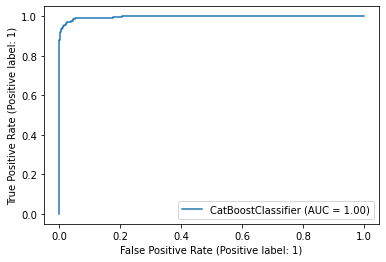

In [67]:
predictions(cat, X_train, X_test, y_train, y_test)

### SVM

In [ ]:
svc = SVC()

predictions(svc, X_train, X_test, y_train, y_test)